In [1]:
import ROOT as r
from ROOT import TFile, TTree, TH1F, TCanvas, TMath, TLegend
from array import array
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot
import sys, os
import pandas as pd
import numpy as np
#plt.style.use('default')

%matplotlib inline
%jsroot on 

Welcome to JupyROOT 6.22/06


/disk/users/abuonaura/miniconda3/envs/lhcb_ana/lib/python3.7/site-packages/uproot/reading.py:186: FutureWarning: XRootD 5.1.1 is not fully supported; either upgrade to 5.2.0+ or set

    open.defaults["xrootd_handler"] = uproot.MultithreadedXRootDSource

  warnings.warn(message, FutureWarning)


In [2]:
folder = '/disk/lhcb_data2/RLcMuonic2016/MC_full_trueTrigger/'
file = uproot.open(folder+'Lb_Lcmunu_MagUp_full.root')

In [3]:
file

<ReadOnlyDirectory '/' at 0x7f785ad5c5f8>

In [4]:
file.keys()

['tupleout;1', 'tupleout/DecayTree;1']

In [5]:
t =file['tupleout/DecayTree']

In [6]:
t.keys()

['Lb_IPCHI2_OWNPV',
 'Lb_IP_OWNPV',
 'Lb_MINIP',
 'Lb_MINIPCHI2',
 'Lb_TRACK_CHI2',
 'Lb_ghost',
 'Lb_ENDVERTEX_X',
 'Lb_ENDVERTEX_Y',
 'Lb_ENDVERTEX_Z',
 'Lb_ENDVERTEX_XERR',
 'Lb_ENDVERTEX_YERR',
 'Lb_ENDVERTEX_ZERR',
 'Lb_ENDVERTEX_CHI2',
 'Lb_ENDVERTEX_NDOF',
 'Lb_ENDVERTEX_COV_',
 'Lb_OWNPV_X',
 'Lb_OWNPV_Y',
 'Lb_OWNPV_Z',
 'Lb_OWNPV_XERR',
 'Lb_OWNPV_YERR',
 'Lb_OWNPV_ZERR',
 'Lb_OWNPV_CHI2',
 'Lb_OWNPV_NDOF',
 'Lb_OWNPV_COV_',
 'Lb_FD_OWNPV',
 'Lb_FDCHI2_OWNPV',
 'Lb_DIRA_OWNPV',
 'Lb_P',
 'Lb_PT',
 'Lb_PE',
 'Lb_PX',
 'Lb_PY',
 'Lb_PZ',
 'Lb_MM',
 'Lb_MMERR',
 'Lb_M',
 'Lb_BKGCAT',
 'Lb_TRUEID',
 'Lb_MC_MOTHER_ID',
 'Lb_MC_MOTHER_KEY',
 'Lb_MC_GD_MOTHER_ID',
 'Lb_MC_GD_MOTHER_KEY',
 'Lb_MC_GD_GD_MOTHER_ID',
 'Lb_MC_GD_GD_MOTHER_KEY',
 'Lb_TRUEP_E',
 'Lb_TRUEP_X',
 'Lb_TRUEP_Y',
 'Lb_TRUEP_Z',
 'Lb_TRUEPT',
 'Lb_TRUEORIGINVERTEX_X',
 'Lb_TRUEORIGINVERTEX_Y',
 'Lb_TRUEORIGINVERTEX_Z',
 'Lb_TRUEENDVERTEX_X',
 'Lb_TRUEENDVERTEX_Y',
 'Lb_TRUEENDVERTEX_Z',
 'Lb_TRUEISSTABLE',
 'Lb_T

In [7]:
variables = ['Lb_IPCHI2_OWNPV', 'Lb_IP_OWNPV', 'Lb_TRUEP_X','Lb_TRUEP_Y','Lb_TRUEP_Z','Lb_BKGCAT','Lc_BKGCAT',
            'Lb_TRUEID', 'Lc_TRUEID', 'mu_TRUEID', 'mu_MC_MOTHER_ID','Lb_P','Lb_PT','mu_PT',
             'FitVar_El_mLc','FitVar_q2_mLc','FitVar_Mmiss2_mLc']
branches = t.arrays(variables, library="np")

In [8]:
branches

{'Lb_IPCHI2_OWNPV': array([ 487.36541727,   13.09602317,   42.31648807, ..., 3449.76002402,
          79.04225759,   79.04225759]),
 'Lb_IP_OWNPV': array([0.40957554, 0.05875688, 0.09904997, ..., 1.04253254, 0.12816994,
        0.12816994]),
 'Lb_TRUEP_X': array([  307.77,  1611.12,    35.4 , ...,  3265.89, -5428.89, -5428.89]),
 'Lb_TRUEP_Y': array([-6781.53,  5915.62, -4782.76, ...,  6333.49,   975.49,   975.49]),
 'Lb_TRUEP_Z': array([117873.13,  60606.94, 107245.76, ...,  70223.04,  70151.94,
         70151.94]),
 'Lb_BKGCAT': array([40, 40, 40, ..., 40, 40, 40], dtype=int32),
 'Lc_BKGCAT': array([ 0,  0,  0, ...,  0, 30,  0], dtype=int32),
 'Lb_TRUEID': array([-5122, -5122, -5122, ...,  5122,  5122,  5122], dtype=int32),
 'Lc_TRUEID': array([-4122, -4122, -4122, ...,  4122,  4122,  4122], dtype=int32),
 'mu_TRUEID': array([-13, -13, -13, ...,  13,  13,  13], dtype=int32),
 'mu_MC_MOTHER_ID': array([-5122, -5122, -5122, ...,  5122,  5122,  5122], dtype=int32),
 'Lb_P': array([10550

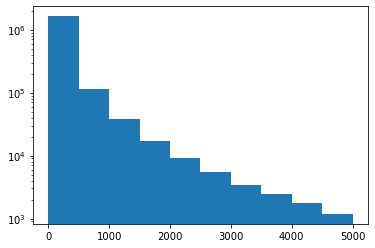

In [9]:
plt.hist(branches['Lb_IPCHI2_OWNPV'],bins=10, range=(0, 5000))
plt.yscale('log')
plt.show()

In [10]:
TruthMatch_mask = (branches['Lc_BKGCAT']<30) & (branches['Lb_BKGCAT']<50) & (abs(branches['Lb_TRUEID'])==5122) & (abs(branches['Lc_TRUEID'])==4122) & (abs(branches['mu_TRUEID'])==13)
TruthMatch_mask

array([ True,  True,  True, ...,  True, False,  True])

In [11]:
MuonMother_mask = branches['mu_MC_MOTHER_ID']==5122

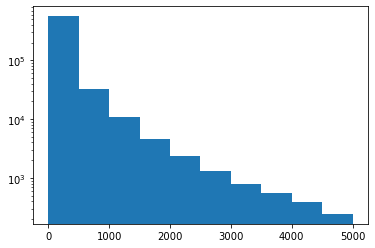

In [12]:
plt.hist(branches['Lb_IPCHI2_OWNPV'][TruthMatch_mask & MuonMother_mask].flatten(),bins=10, range=(0, 5000))
plt.yscale('log')
plt.show()

In [13]:
samples = ['Lb_Lcmunu','Lb_Lctaunu','Lb_LcDs','Lb_Lc2593munu','Lb_Lc2593taunu','Lb_Lc2593Ds',
             'Lb_Lc2625munu','Lb_Lc2625taunu','Lb_Lc2625Ds']
polarities = ['MagUp','MagDown']
folder = '/disk/lhcb_data2/RLcMuonic2016/MC_full_trueTrigger/'
folderTO = '/disk/lhcb_data2/RLcMuonic2016/MC_TrackerOnly/'
muMotherID = {'Lb_Lcmunu':[5122],'Lb_Lc2625munu':[5122],'Lb_Lc2593munu':[5122],
             'Lb_Lctaunu':[13],'Lb_Lc2625taunu':[13],'Lb_Lc2593taunu':[13],
             'Lb_LcDs':[431,421,411],'Lb_Lc2625Ds':[431,421,411],'Lb_Lc2593Ds':[431,421,411]}
variables = ['Lb_IPCHI2_OWNPV', 'Lb_IP_OWNPV', 'Lb_TRUEP_X','Lb_TRUEP_Y','Lb_TRUEP_Z','Lb_BKGCAT','Lc_BKGCAT',
            'Lb_TRUEID', 'Lc_TRUEID', 'mu_TRUEID', 'mu_MC_MOTHER_ID','Lb_P','Lb_PT','Lc_M','mu_PT',
             'FitVar_El_mLc','FitVar_q2_mLc','FitVar_Mmiss2_mLc']

In [14]:
def TruthMatchMotherID(sample,branches):
    if sample not in ['Lb_LcDs','Lb_Lc2625Ds','Lb_Lc2593Ds']:
        MuonMother_mask = abs(branches['mu_MC_MOTHER_ID'])==muMotherID[sample][0]
    else:
        MuonMother_mask = (abs(branches['mu_MC_MOTHER_ID'])==muMotherID[sample][0])|(abs(branches['mu_MC_MOTHER_ID'])==muMotherID[sample][1])|(abs(branches['mu_MC_MOTHER_ID'])==muMotherID[sample][2])
    return MuonMother_mask

In [15]:
def TruthMatch(sample, branches):
    TruthMatch_mask = (branches['Lc_BKGCAT']<30) & (branches['Lb_BKGCAT']<50) & (abs(branches['Lb_TRUEID'])==5122) & (abs(branches['Lc_TRUEID'])==4122)
    return TruthMatch_mask

In [ ]:
samples = ['Lb_Lcmunu']
for sample in samples:
    f = uproot.open(folder+'Lb_Lcmunu_MagUp_full.root')
    t = f['tupleout/DecayTree']
    fTO = uproot.open(folderTO+sample+'_MagUp.root')
    tTO = fTO['tupleout/DecayTree']
    branches = t.arrays(variables, library="np")
    branchesTO = tTO.arrays(variables, library="np")
    MuonMother_mask = TruthMatchMotherID(sample,branches)
    MuonMother_mask_TO = TruthMatchMotherID(sample,branchesTO)
    TruthMatch_mask = TruthMatch(sample, branches)
    TruthMatch_mask_TO = TruthMatch(sample, branchesTO)


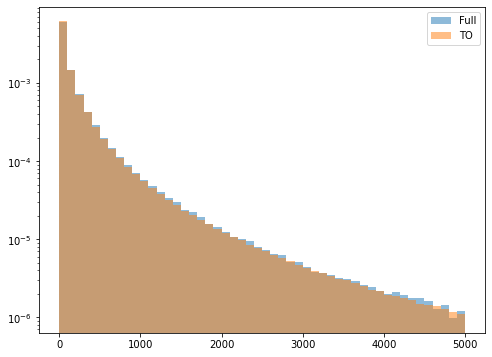

In [41]:
    plt.figure(figsize=(8,6))
    plt.hist(branches['Lb_IPCHI2_OWNPV'][TruthMatch_mask & MuonMother_mask].flatten(),bins=50, range=(0, 5000),density=True,alpha=0.5,label='Full')
    plt.hist(branchesTO['Lb_IPCHI2_OWNPV'][TruthMatch_mask_TO & MuonMother_mask_TO].flatten(),bins=50, range=(0, 5000), density=True,alpha=0.5,label='TO')
    plt.legend(loc='upper right')
    plt.yscale('log')
    plt.show()

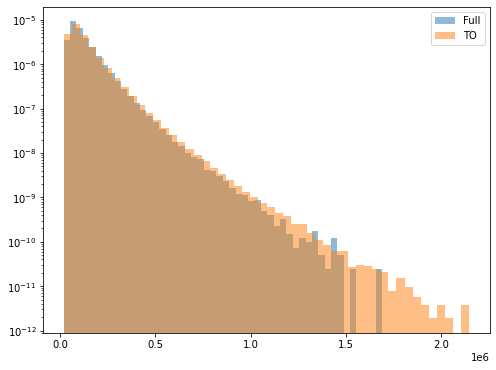

In [44]:
    plt.figure(figsize=(8,6))
    plt.hist(branches['Lb_P'][TruthMatch_mask & MuonMother_mask].flatten(),bins=50,density=True,alpha=0.5,label='Full')
    plt.hist(branchesTO['Lb_P'][TruthMatch_mask_TO & MuonMother_mask_TO].flatten(),bins=50,density=True,alpha=0.5,label='TO')
    plt.legend(loc='upper right')
    plt.yscale('log')
    plt.show()